**K-Nearest Neighbors**

Di Lab ini Anda akan memuat kumpulan data pelanggan, menyesuaikan data, dan menggunakan K-Nearest Neighbors untuk memprediksi titik data. Namun, apa itu K-Nearest Neighbors?

K-Nearest Neighbors adalah algoritma untuk supervised learning. Di mana data 'dilatih' dengan titik data yang sesuai dengan klasifikasinya. Setelah suatu titik diprediksi, ia memperhitungkan 'K' titik terdekat untuk menentukan klasifikasinya.

![](https://static1.squarespace.com/static/55ff6aece4b0ad2d251b3fee/t/5752540b8a65e246000a2cf9/1465017829684/)

Dalam kasus ini, kita memiliki titik data Kelas A dan B. Kita ingin memprediksi bintang (titik data uji) tersebut. Jika kita mempertimbangkan nilai k sebesar 3 (3 titik data terdekat), kita akan memperoleh prediksi Kelas B. Namun, jika kita mempertimbangkan nilai k sebesar 6, kita akan memperoleh prediksi Kelas A.

Dalam hal ini, penting untuk mempertimbangkan nilai k. Namun, mudah-mudahan dari diagram ini, Anda akan mendapatkan gambaran tentang apa itu algoritma K-Nearest Neighbors. Algoritma ini mempertimbangkan 'K' Nearest Neighbors (titik) saat memprediksi klasifikasi titik uji.

**Mari memuat pustaka yang diperlukan**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**About dataset**

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 
The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 
The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service
Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

Lets download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.

**Load Data From CSV File**

In [4]:
df = pd.read_csv('./Diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Visualisasi dan Analisis Data**       
Mari kita lihat berapa banyak kelas yang ada dalam kumpulan data kita.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

281 Pelanggan Plus Service, 266 Pelanggan Basic-service, 236 Pelanggan Total Service, dan 217 Pelanggan E-Service

Anda dapat dengan mudah menjelajahi data Anda menggunakan teknik visualisasi:

array([[<Axes: title={'center': 'Outcome'}>]], dtype=object)

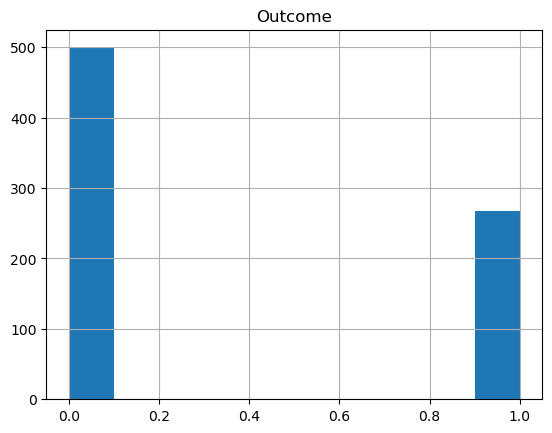

In [7]:
df.hist(column='Outcome', bins = 10)

**Feature set**

Lets defind feature sets, X

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [9]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

What are our lables?

In [11]:
X = df.drop(columns=['Outcome'])  
y = df['Outcome'] 

**Normalize Data**

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Pelatihan Uji Terpisah**

Keakuratan di Luar Sampel adalah persentase prediksi yang benar yang dibuat model pada data yang BELUM dilatihkan pada model tersebut. Melakukan pelatihan dan pengujian pada set data yang sama kemungkinan besar akan memiliki keakuratan di luar sampel yang rendah, karena kemungkinan terjadi over-fit.

Penting bagi model kita untuk memiliki keakuratan di luar sampel yang tinggi, karena tujuan dari setiap model, tentu saja, adalah untuk membuat prediksi yang benar pada data yang tidak diketahui. Jadi, bagaimana kita dapat meningkatkan keakuratan di luar sampel? Salah satu caranya adalah dengan menggunakan pendekatan evaluasi yang disebut Pembagian Pelatihan/Pengujian. Pembagian Pelatihan/Pengujian melibatkan pemisahan set data menjadi set pelatihan dan pengujian masing-masing, yang saling eksklusif. Setelah itu, Anda melatih dengan set pelatihan dan menguji dengan set pengujian.

Ini akan memberikan evaluasi yang lebih akurat pada keakuratan di luar sampel karena set data pengujian bukan bagian dari set data yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


**Klasifikasi**

K nearest neighbor (K-NN)

Impor pustaka

Pengklasifikasi yang menerapkan pemungutan suara k-tetangga terdekat.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

**Pelatihan**

Mari kita mulai algoritma dengan k=3 untuk saat ini:

In [26]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat = neigh.predict(X_test)

**Memprediksi**

Kita dapat menggunakan model untuk memprediksi set pengujian:

**Evaluasi akurasi**

Dalam klasifikasi multilabel, fungsi skor klasifikasi akurasi menghitung akurasi subset. Fungsi ini sama dengan fungsi jaccard_similarity_score. Pada dasarnya, fungsi ini menghitung seberapa cocok label aktual dan label yang diprediksi dalam set pengujian.

In [27]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8143322475570033
Test set Accuracy:  0.7532467532467533


**Latihan**

Bisakah Anda membuat model lagi, tetapi kali ini dengan k=6?

**Mencari Akurasi dan Standar Deviasi**

In [28]:
k = 6

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))


Train set Accuracy:  0.7866449511400652
Test set Accuracy:  0.7662337662337663


**Bagaimana dengan K lainnya?**     

K dalam KNN adalah jumlah tetangga terdekat yang akan diperiksa. Jumlah tersebut seharusnya ditentukan oleh Pengguna. Jadi, bagaimana kita memilih K yang tepat? Solusi umumnya adalah dengan menyisihkan sebagian data Anda untuk menguji keakuratan model. Kemudian pilih k = 1, gunakan bagian pelatihan untuk pemodelan, dan hitung keakuratan prediksi menggunakan semua sampel dalam set pengujian Anda. Ulangi proses ini, tingkatkan k, dan lihat k mana yang terbaik untuk model Anda.

Kita dapat menghitung keakuratan KNN untuk K yang berbeda.

In [45]:
Ks = 95
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7012987 , 0.75974026, 0.73376623, 0.75324675, 0.72727273,
       0.76623377, 0.75324675, 0.75324675, 0.75324675, 0.75974026,
       0.75324675, 0.75974026, 0.75324675, 0.77272727, 0.73376623,
       0.75324675, 0.74675325, 0.77272727, 0.75974026, 0.77272727,
       0.75324675, 0.75324675, 0.75974026, 0.75974026, 0.75974026,
       0.77272727, 0.76623377, 0.74675325, 0.77922078, 0.77272727,
       0.78571429, 0.77922078, 0.78571429, 0.77272727, 0.76623377,
       0.76623377, 0.76623377, 0.76623377, 0.78571429, 0.76623377,
       0.77922078, 0.75324675, 0.77922078, 0.77922078, 0.78571429,
       0.77922078, 0.77272727, 0.76623377, 0.75974026, 0.76623377,
       0.78571429, 0.77922078, 0.77272727, 0.77272727, 0.77922078,
       0.78571429, 0.77922078, 0.77922078, 0.78571429, 0.78571429,
       0.78571429, 0.7987013 , 0.78571429, 0.78571429, 0.78571429,
       0.78571429, 0.77922078, 0.78571429, 0.78571429, 0.77922078,
       0.77922078, 0.77272727, 0.78571429, 0.79220779, 0.77922

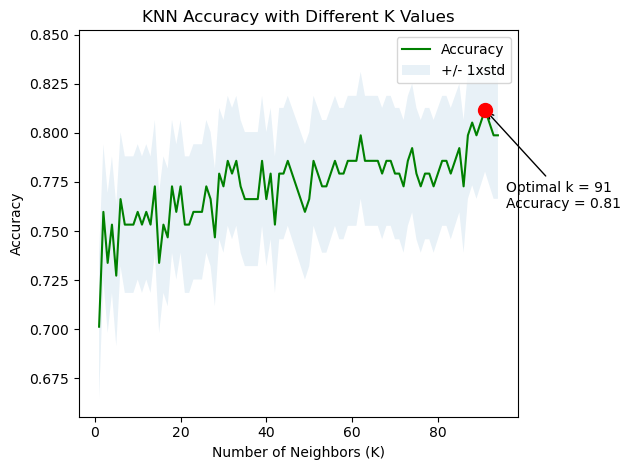

In [46]:

optimal_k = np.argmax(mean_acc) + 1 
optimal_accuracy = mean_acc[optimal_k - 1]


plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)

# Menandai k optimal
plt.scatter(optimal_k, optimal_accuracy, color='red', s=100, zorder=5)  
plt.annotate(f'Optimal k = {optimal_k}\nAccuracy = {optimal_accuracy:.2f}', 
             xy=(optimal_k, optimal_accuracy), 
             xytext=(optimal_k + 5, optimal_accuracy - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend(('Accuracy', '+/- 1xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.title('KNN Accuracy with Different K Values')
plt.tight_layout()
plt.show()

In [58]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8116883116883117 with k= 91


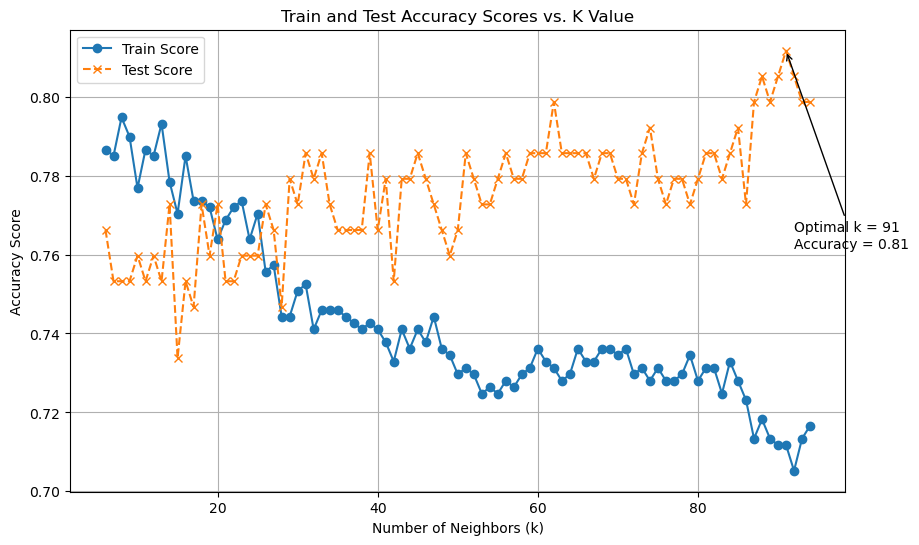

In [49]:
train_scores = []
test_scores = []

# Rentang nilai k yang akan diuji
k_values = range(6, 95)

# Loop untuk menghitung akurasi pada setiap nilai k
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    # Hitung akurasi pada data train dan test
    train_accuracy = accuracy_score(y_train, neigh.predict(X_train))
    test_accuracy = accuracy_score(y_test, neigh.predict(X_test))
    
    # Simpan hasilnya ke dalam daftar
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Menentukan nilai k optimal
optimal_k = k_values[np.argmax(test_scores)]
optimal_accuracy = max(test_scores)

# Plot grafik Train Score dan Test Score
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label="Train Score", marker='o', linestyle='-')
plt.plot(k_values, test_scores, label="Test Score", marker='x', linestyle='--')

# Menandai k optimal
plt.annotate(f'Optimal k = {optimal_k}\nAccuracy = {optimal_accuracy:.2f}', 
             xy=(optimal_k, optimal_accuracy), 
             xytext=(optimal_k + 1, optimal_accuracy - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("Train and Test Accuracy Scores vs. K Value")
plt.legend()
plt.grid()
plt.show()

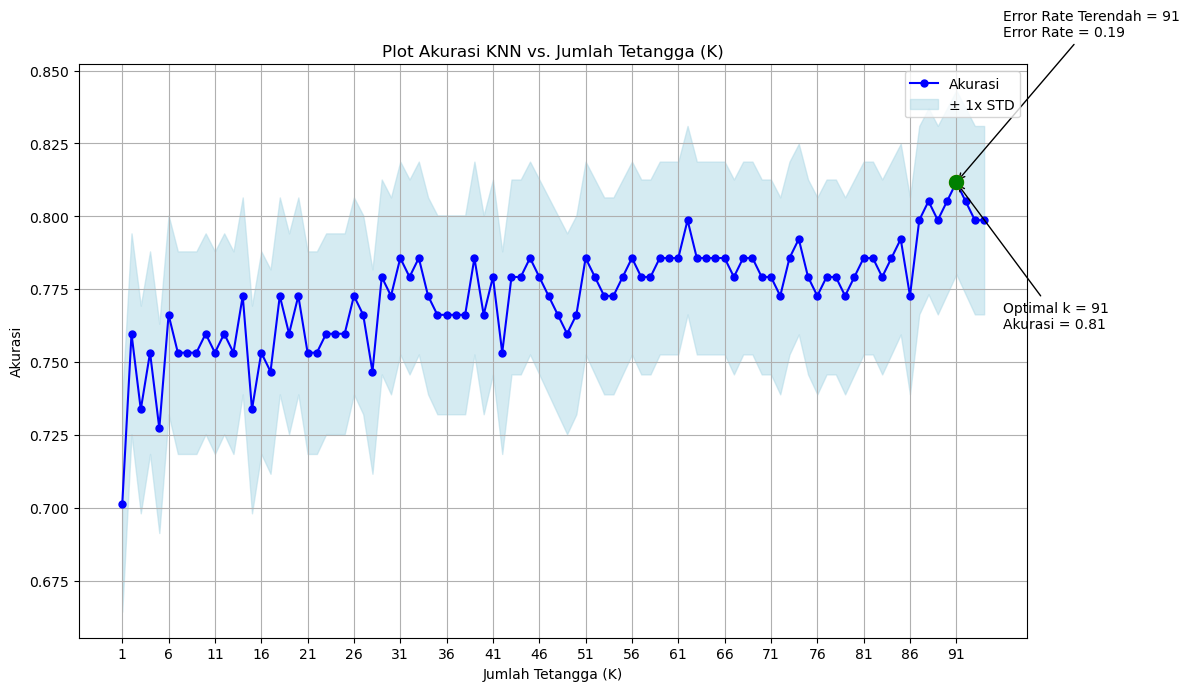

In [54]:
Ks = 95
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
error_rates = np.zeros((Ks-1))

# Loop untuk menghitung akurasi pada setiap nilai k
for n in range(1, Ks):
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
    error_rates[n-1] = 1 - mean_acc[n-1]  # Hitung error rate

# Plot grafik garis
plt.figure(figsize=(12, 7))
plt.plot(range(1, Ks), mean_acc, color='blue', marker='o', markersize=5, label='Akurasi')  # Garis akurasi
plt.fill_between(range(1, Ks), mean_acc - std_acc, mean_acc + std_acc, color='lightblue', alpha=0.5, label='± 1x STD')  # Area deviasi standar

# Menentukan error rate paling rendah
lowest_error_rate_index = np.argmin(error_rates)
lowest_error_rate = error_rates[lowest_error_rate_index]
lowest_k = lowest_error_rate_index + 1  # Menambahkan 1 karena indeks dimulai dari 0

# Menandai k dengan error rate paling rendah
plt.scatter(lowest_k, 1 - lowest_error_rate, color='orange', s=100, zorder=5)  # Titik untuk k dengan error rate terendah
plt.annotate(f'Error Rate Terendah = {lowest_k}\nError Rate = {lowest_error_rate:.2f}', 
             xy=(lowest_k, 1 - lowest_error_rate), 
             xytext=(lowest_k + 5, 1 - lowest_error_rate + 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Menentukan nilai k optimal
optimal_k = np.argmax(mean_acc) + 1  # Menambahkan 1 karena indeks dimulai dari 0
optimal_accuracy = mean_acc[optimal_k - 1]

# Menandai k optimal
plt.scatter(optimal_k, optimal_accuracy, color='green', s=100, zorder=5)  # Titik untuk k optimal
plt.annotate(f'Optimal k = {optimal_k}\nAkurasi = {optimal_accuracy:.2f}', 
             xy=(optimal_k, optimal_accuracy), 
             xytext=(optimal_k + 5, optimal_accuracy - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('Plot Akurasi KNN vs. Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xlabel('Jumlah Tetangga (K)')
plt.xticks(range(1, Ks, 5))  # Set interval tampilan x-axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Kesimpulan

Dalam penelitian ini, kami menerapkan metode K-Nearest Neighbors (KNN) untuk memprediksi penyakit diabetes. Setelah melakukan berbagai percobaan dengan nilai **k** yang berbeda, kami menemukan bahwa nilai **k** optimal adalah **91**, yang menghasilkan akurasi terbaik sebesar **81.17%**.

Akurasi ini menunjukkan bahwa model KNN yang kami gunakan dapat dengan baik memprediksi keberadaan penyakit diabetes berdasarkan data yang tersedia. Meskipun hasil ini menjanjikan, kami menyadari pentingnya melakukan validasi lebih lanjut dan pengujian model dengan data yang lebih beragam untuk memastikan konsistensi dan generalisasi dari model ini.

Dengan hasil ini, kami berharap penelitian ini dapat memberikan kontribusi dalam upaya pencegahan dan deteksi dini penyakit diabetes, serta menjadi dasar untuk penelitian lebih lanjut di bidang ini.


In [59]:
best_accuracy = 0.8116883116883117

# Menghitung error rate
error_rate = 1 - best_accuracy

# Menampilkan hasil
print(f"Akurasi terbaik adalah {best_accuracy} with k= 91.")
print(f"Tingkat error rate: {error_rate:.4f}")

The best accuracy was with 0.8116883116883117 with k= 91.
The error rate is: 0.1883


## Kesimpulan

Dalam penelitian ini, kami menggunakan metode K-Nearest Neighbors (KNN) untuk memprediksi penyakit diabetes. Berdasarkan eksperimen yang dilakukan, akurasi terbaik yang diperoleh adalah **81.17%** dengan nilai **k** sebesar **91**. 

Hal ini menunjukkan bahwa model KNN mampu mengenali pola dalam data dengan cukup baik pada nilai **k** ini. Namun, terdapat juga **tingkat kesalahan** (error rate) sebesar **18.83%**, yang berarti model ini masih dapat ditingkatkan lebih lanjut.

Keputusan untuk memilih nilai **k** yang optimal sangat penting dalam pengembangan model KNN. Dengan pemilihan yang tepat, model dapat memberikan hasil prediksi yang lebih akurat dan relevan. Penelitian ini memberikan wawasan bahwa ada peluang untuk mengoptimalkan model lebih lanjut dengan teknik dan parameter lainnya.
